## Mid-term Project (Linear Regression)

Git-hub:https://github.com/nimesh2091/Auto-MPG

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#### With all the necessary packages and libraries imported, let's import the data and explore it.

In [2]:
#import data
cars = pd.read_csv('mpg.csv')

In [3]:
#check the columns and look for missing values
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
name            398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


#### why is horsepower an object and not a float? 
#### Let's have a look at the unique values of horsepower to know if there are any discrepancies 

In [4]:
cars['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148', '129',
       '96', '71', '98', '115', '53', '81', '79', '120', '152', '102',
       '108', '68', '58', '149', '89', '63', '48', '66', '139', '103',
       '125', '133', '138', '135', '142', '77', '62', '132', '84', '64',
       '74', '116', '82'], dtype=object)

In [5]:
#since, horsepower values are car specific and cannot be imputed, we remove observations with horsepower='?'
cars = cars[(cars['horsepower']!='?')]

#convert the type for horsepower to float
cars['horsepower']=cars['horsepower'].astype('float')
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
model_year      392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


#### Let's start Exploring the data and acquire insights from it.

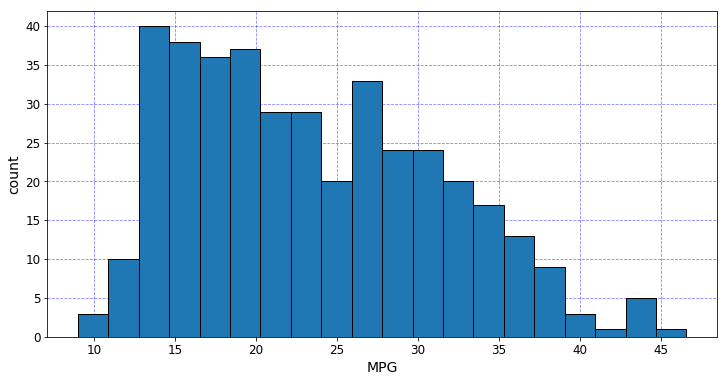

In [6]:
fig, axes = plt.subplots(1,1, figsize=(12,6))
plt.xlabel('MPG',fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('count',fontsize=14)
plt.yticks(fontsize=12)
plt.hist(cars['mpg'],bins=20,edgecolor='black',linewidth=1.0)
axes.grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.8,visible=True)
axes.set_axisbelow(True)

MPG is right skewed a bit, but the values are close enough.

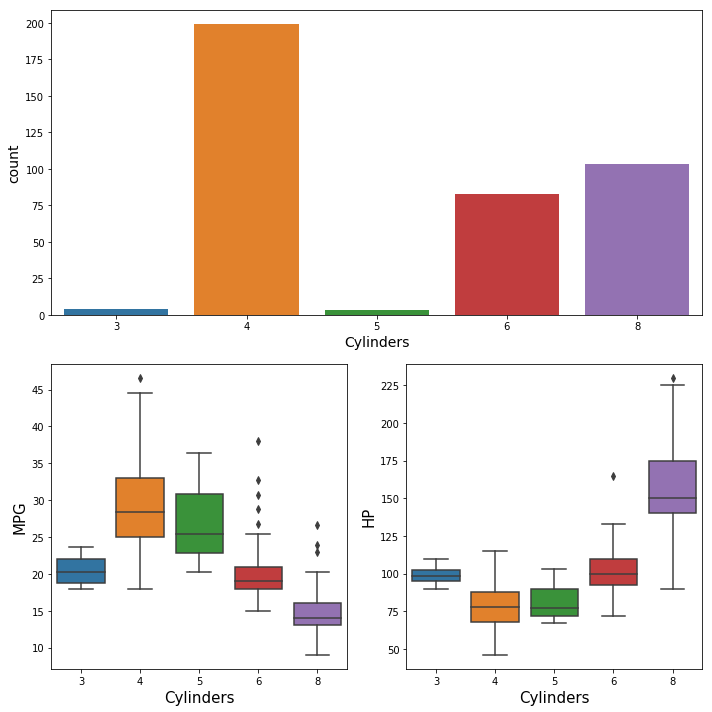

In [7]:
fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot2grid((2,2), (0,0), colspan=2)
ax2 = plt.subplot2grid((2,2), (1,0))
ax3 = plt.subplot2grid((2,2), (1,1))

sns.countplot(cars['cylinders'],ax=ax1)
ax1.set_xlabel('Cylinders',fontsize=14)
ax1.set_ylabel('count',fontsize=14)

sns.boxplot(cars['cylinders'],cars['mpg'], ax= ax2)
ax2.set_xlabel('Cylinders',fontsize=15)
ax2.set_ylabel('MPG',fontsize=15)

sns.boxplot(cars['cylinders'],cars['horsepower'], ax= ax3)
ax3.set_xlabel('Cylinders',fontsize=15)
ax3.set_ylabel('HP',fontsize=15)

fig.tight_layout()

#### - most of the cars have 4-cylinder engine
#### - as number of cylinders in the engine increases above 4, MPG decreases
#### - as number of cylinders in the engine increases above 4, power of the engine increases

Lets's split the feature-'Name', to get the different car-brands

In [8]:
def brand(cols):
    name_split = cols.split()
    return(name_split[0])

cars['brand'] = cars['name'].apply(brand)
cars['brand'].unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac', 'dodge',
       'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi', 'saab', 'bmw',
       'chevy', 'hi', 'mercury', 'opel', 'fiat', 'oldsmobile', 'chrysler',
       'mazda', 'volvo', 'renault', 'toyouta', 'maxda', 'honda', 'subaru',
       'chevroelt', 'capri', 'vw', 'mercedes-benz', 'cadillac', 'mercedes',
       'vokswagen', 'triumph', 'nissan'], dtype=object)

Make corrections to car-brand names, wherever it is required

In [9]:
cars['brand'] = cars['brand'].replace(['volkswagen','vokswagen','vw'],'VW')
cars['brand'] = cars['brand'].replace('maxda','mazda')
cars['brand'] = cars['brand'].replace('toyouta','toyota')
cars['brand'] = cars['brand'].replace('mercedes','mercedes-benz')
cars['brand'] = cars['brand'].replace('nissan','datsun')
cars['brand'] = cars['brand'].replace('capri','ford')
cars['brand'] = cars['brand'].replace(['chevroelt','chevy'],'chevrolet')

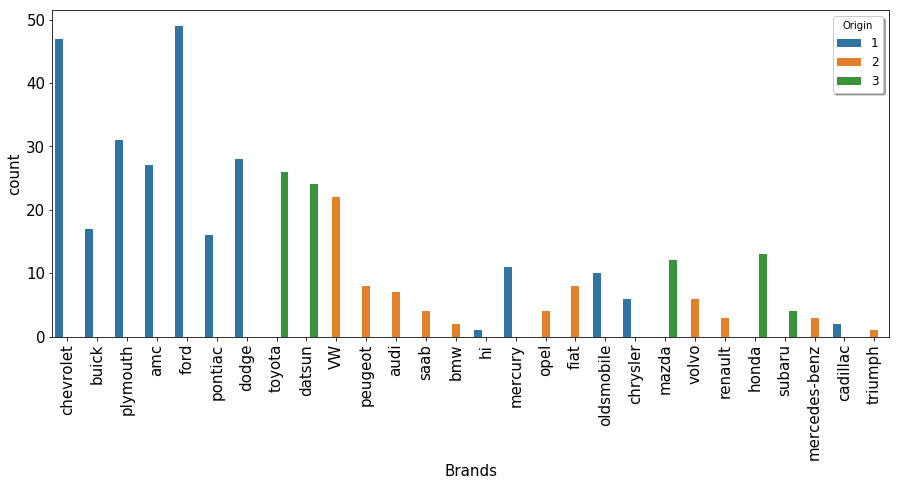

In [10]:
fig, axes = plt.subplots(1,1, figsize=(15,6))
sns.countplot(cars['brand'],hue=cars['origin'])
plt.xlabel('Brands',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
legend = axes.legend(loc='upper right', shadow=True, title='Origin',fontsize=12)

#### From the plot aboveand knowledge about car manufacturers, we can clearly see that Origin codes are country-codes.
#### 1 -> USA   2-> Europe   3-> Japan

In [11]:
def country(origin):
    if origin == 1:
        return('USA')
    elif origin == 2:
        return('Europe')
    else:
        return('Japan')
cars['country'] = cars['origin'].apply(country)

(array([  5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.]),
 <a list of 10 Text yticklabel objects>)

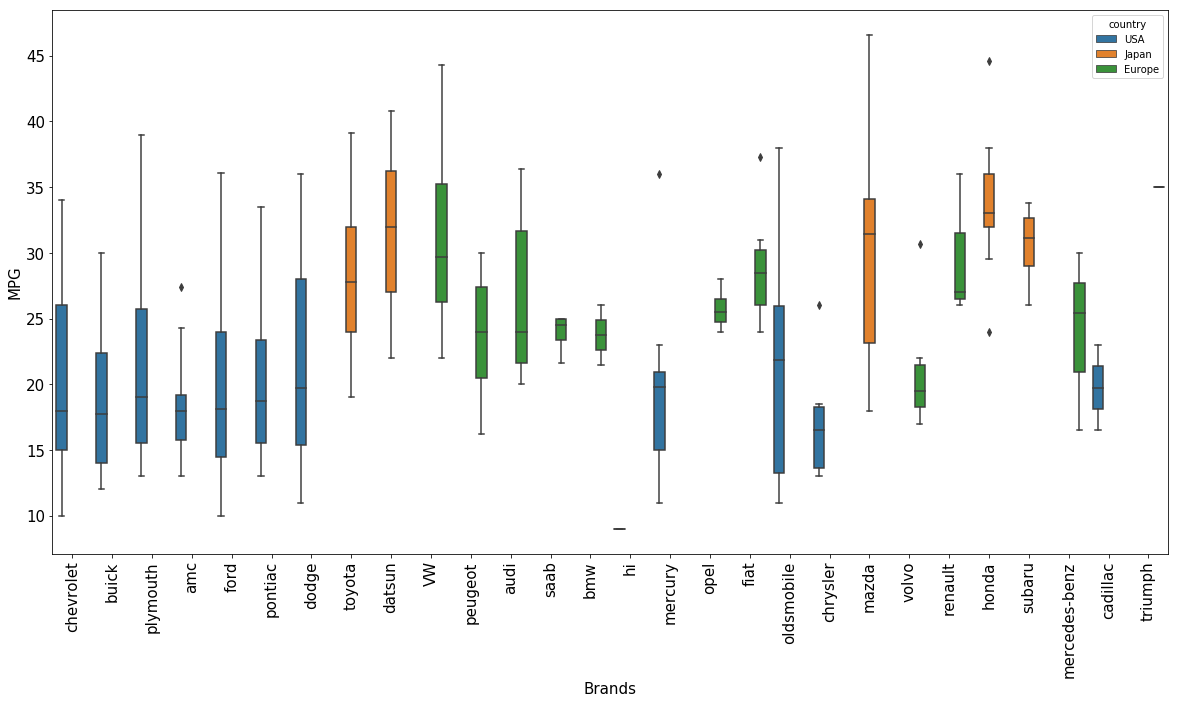

In [12]:
fig, axes = plt.subplots(1,1, figsize=(20,10))
sns.boxplot(cars['brand'],cars['mpg'],hue=cars['country'])
plt.xlabel('Brands',fontsize=15)
plt.ylabel('MPG',fontsize=15)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)

#### We come to know that Japanese and European Car models provide more MPG than cars manufactured by USA

(array([  25.,   50.,   75.,  100.,  125.,  150.,  175.,  200.,  225.,  250.]),
 <a list of 10 Text yticklabel objects>)

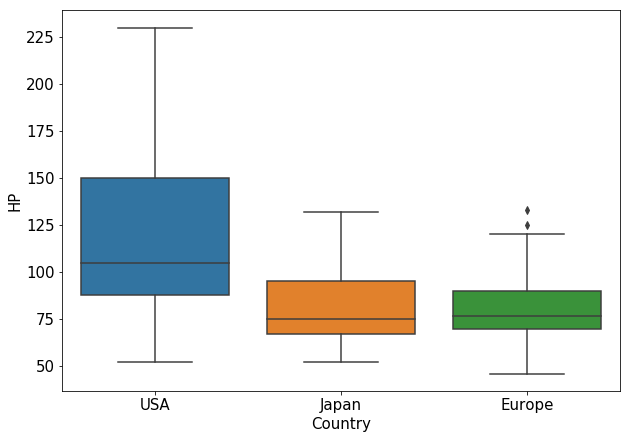

In [13]:
fig, axes = plt.subplots(1,1, figsize=(10,7),)
sns.boxplot(cars['country'],cars['horsepower'])
plt.xlabel('Country',fontsize=15)
plt.ylabel('HP',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#### We observe that USA made cars are more Power intensive.

(array([  5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.]),
 <a list of 10 Text yticklabel objects>)

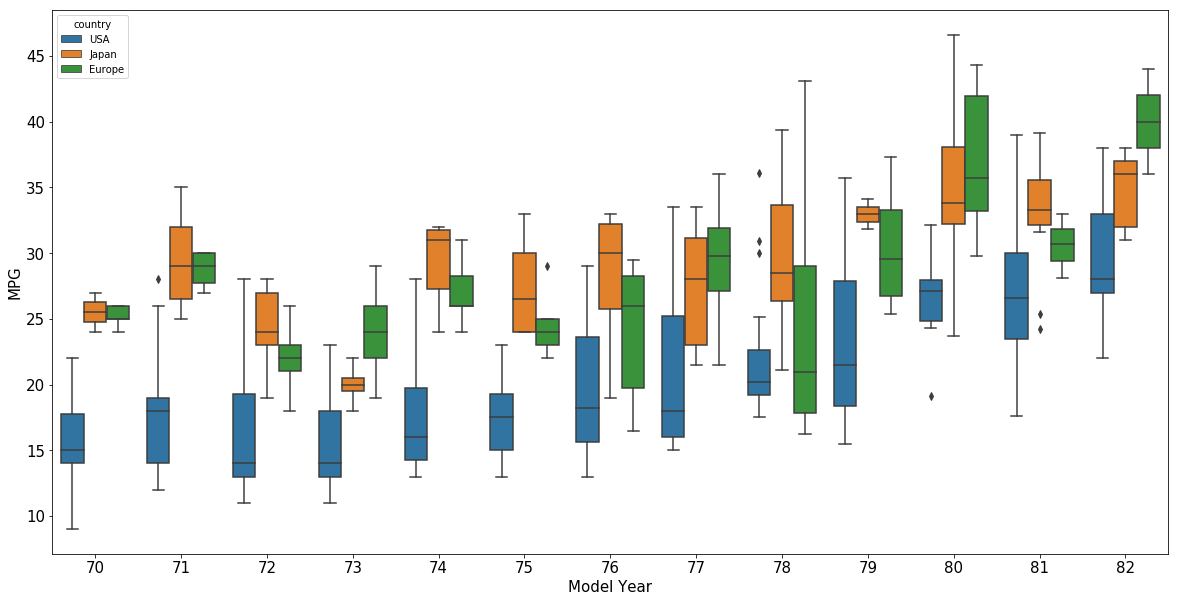

In [14]:
fig, axes = plt.subplots(1,1, figsize=(20,10),)
sns.boxplot(cars['model_year'],cars['mpg'],hue=cars['country'])
plt.xlabel('Model Year',fontsize=15)
plt.ylabel('MPG',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#### Year-over-year there is increase in MPG across all manufacturing nations, which is expected as newer technologies provide better fuel-efficient engines

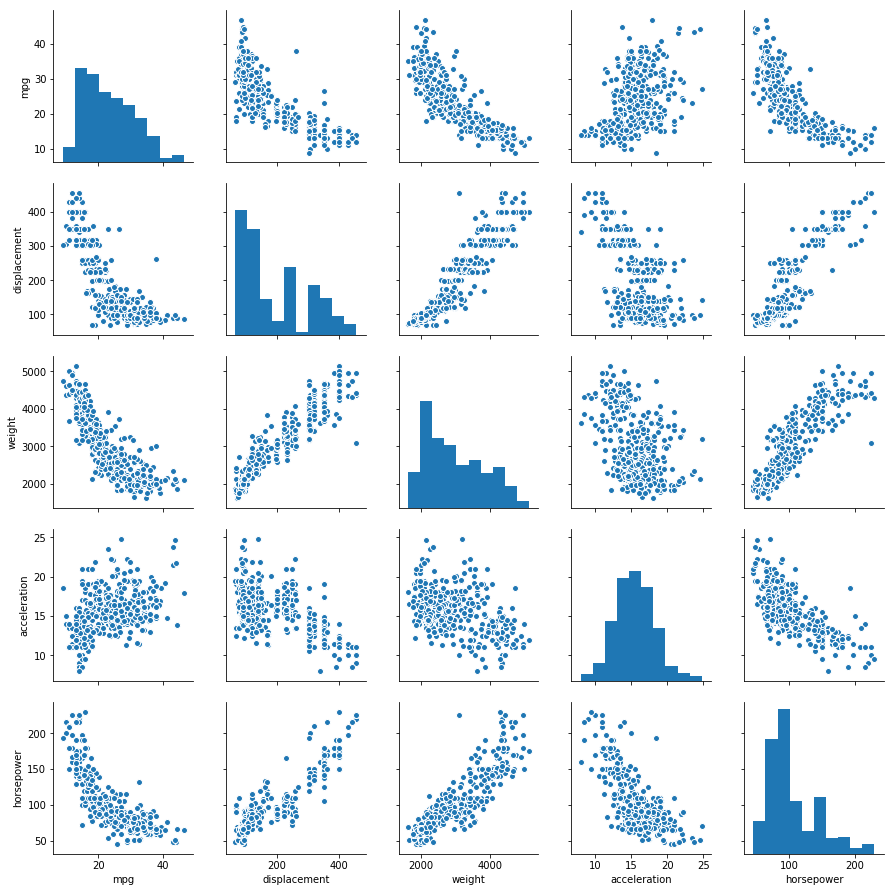

In [15]:
sns.pairplot(cars[['mpg','displacement','weight','acceleration','horsepower']])

#### We observe some non-linear relationship between MPG and horsepower

In [16]:
cars['sqrt_wt'] = cars['weight'].pow(1./2)

Let's look at the correlation between features

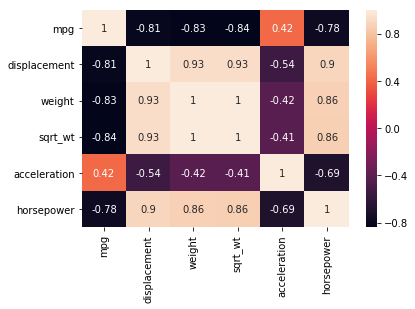

In [17]:
sns.heatmap(cars[['mpg','displacement','weight','sqrt_wt','acceleration','horsepower']].corr(),annot=True)

#### We cannot use feature 'origin' as is, because the values are numerical but categorical(biased), so we need to create dummy variables.

In [18]:
dummies = pd.get_dummies(cars['country'],drop_first=True)
cars = pd.concat([cars,dummies],axis=1)

With the data ready, we can regress MPG against other features to build a model

In [19]:
X = cars.drop(['mpg','name','brand','country','acceleration','origin','Japan'],axis=1)
y = cars['mpg']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.333, random_state=10)

In [21]:
#Since, the values for different features have different scale, let's scale all independent features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
lm = LinearRegression()
linreg = lm.fit(X_train_scaled, y_train)

print('R-squared score (training): {:.3f}'.format(linreg.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'.format(linreg.score(X_test_scaled, y_test)))

R-squared score (training): 0.864
R-squared score (test): 0.828


In [23]:
lm = LinearRegression()
linreg = lm.fit(X_train_scaled, y_train)

print('R-squared score (training): {:.3f}'.format(linreg.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'.format(linreg.score(X_test_scaled, y_test)))

R-squared score (training): 0.864
R-squared score (test): 0.828


### Regression Statistics

In [24]:
predictions = lm.predict(X_test_scaled)

In [25]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.23351769819
MSE: 9.21837301175
RMSE: 3.0361773683


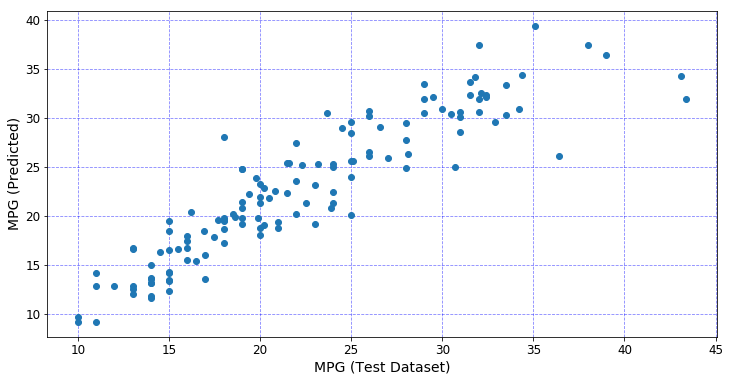

In [26]:
fig, axes = plt.subplots(1,1, figsize=(12,6))
plt.xlabel('MPG (Test Dataset)',fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('MPG (Predicted)',fontsize=14)
plt.yticks(fontsize=12)
plt.scatter(y_test,predictions)
axes.grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.8,visible=True)
axes.set_axisbelow(True)

In [27]:
import statsmodels.api as sm

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [28]:
X_train_1 = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_1)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     229.5
Date:                Thu, 08 Mar 2018   Prob (F-statistic):          1.00e-105
Time:                        17:11:59   Log-Likelihood:                -651.53
No. Observations:                 261   AIC:                             1319.
Df Residuals:                     253   BIC:                             1348.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           67.8810     10.984      6.180   